<a href="https://colab.research.google.com/github/hahajjjun/Scientific-Visualization-Python-Matplotlib/blob/main/Project%201%20%3A%20Dacon_Penguin_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 시각화
아래 시각화 튜토리얼에서는 dabl, matplotlib, seaborn을 활용했습니다.
<br/>
[> dabl 도큐먼트 확인하기](https://amueller.github.io/dabl/dev/)
<br/>
[> matplotlib 도큐먼트 확인하기](https://matplotlib.org/stable/api/index)
<br/>
[> seaborn 도큐먼트 확인하기](https://seaborn.pydata.org/)

## 1.1. 초심자를 위한 자동 시각화 툴 : dabl

dabl은 자동으로 이산 변수, 범주형 변수를 감지하여 correlation을 보여주거나, boxplot 등으로 시각화하는 기능을 제공합니다.
<br/>
주어진 펭귄 데이터처럼 정형 데이터(tabular data)를 활용할 때에는 dabl을 활용해 빠르게 변수 관계를 파악할 수 있을 것입니다.
<br/>
[> dabl 도큐먼트 확인하기](https://amueller.github.io/dabl/dev/)

In [32]:
! pip install dabl # dabl 설치
import dabl
import matplotlib.pyplot as plt
import seaborn as sns

코랩에서는 개인 드라이브에 DACON_PENGUIN 폴더를 만들고, 그 안에 다운로드받은 데이터 파일을 업로드하면 아래 코드로 데이터에 접근할 수 있습니다.

In [33]:
import os
import pandas as pd
import numpy as np
ROOT = '/content/drive/MyDrive/DACON_PENGUIN'
TEST = os.path.join(ROOT, 'test.csv')
TRAIN = os.path.join(ROOT, 'train.csv')
SS = os.path.join(ROOT, 'sample_submission.csv')
test_df = pd.read_csv(TEST)
train_df = pd.read_csv(TRAIN)
ss_df = pd.read_csv(SS)

In [34]:
X = train_df.drop('Body Mass (g)', axis=1)
y = train_df['Body Mass (g)']

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa185a5ba90>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa187a418d0>,
       dtype=object)]

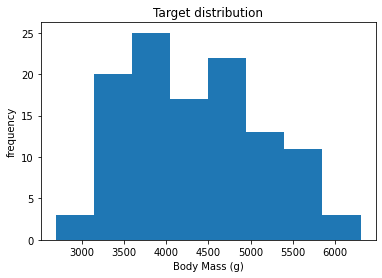

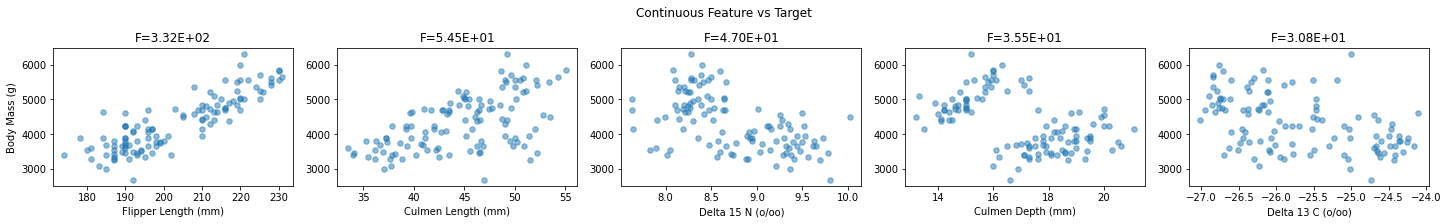

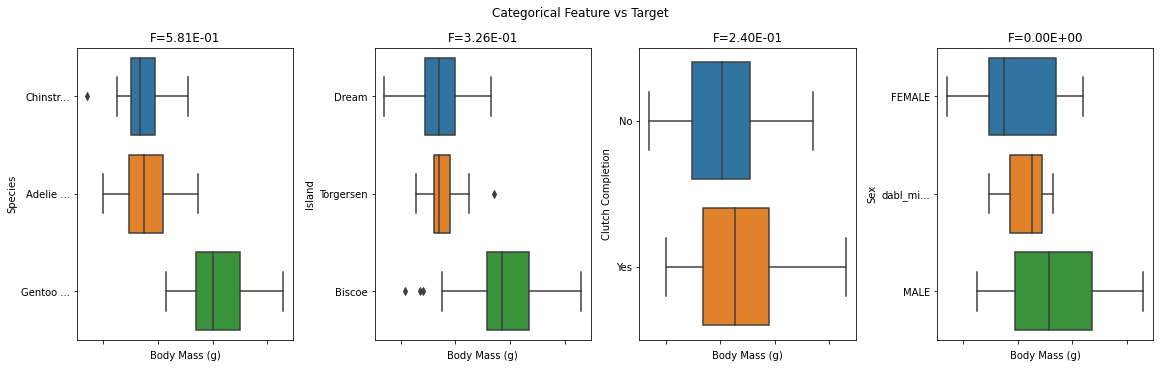

In [35]:
dabl.plot(X,y)

##1.2. matplotlib으로 dabl 시각화 결과 구현하기

히스토그램 : Body Mass의 분포 확인

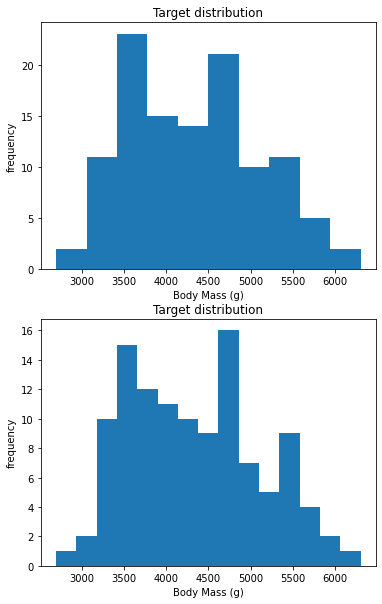

In [36]:
fig, ax = plt.subplots(2,1, figsize = (6,10))
y = train_df['Body Mass (g)']
ax[0].hist(y)
ax[0].set_xlabel('Body Mass (g)')
ax[0].set_ylabel('frequency')
ax[0].set_title('Target distribution')

ax[1].hist(y, bins = 15)
ax[1].set_xlabel('Body Mass (g)')
ax[1].set_ylabel('frequency')
ax[1].set_title('Target distribution')
plt.show()

Density plot : Body Mass 비롯한 데이터 분포 확인

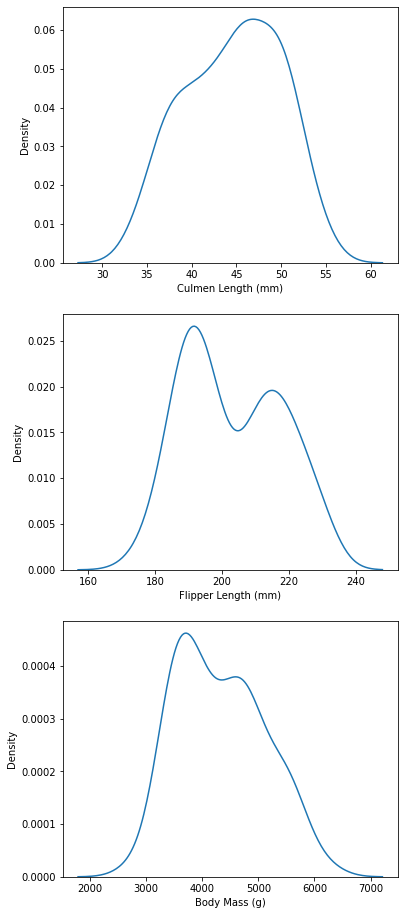

In [37]:
fig, ax = plt.subplots(3,1, figsize = (6,16))
num_columns =['Culmen Length (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
for i in range(len(num_columns)):
  sns.kdeplot(train_df[num_columns[i]], ax = ax[i]) #kde : kernel density estimation

연속형 변수(특히 이산변수)끼리의 correlation 분석

In [38]:
# 이산변수 체크
train_df.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


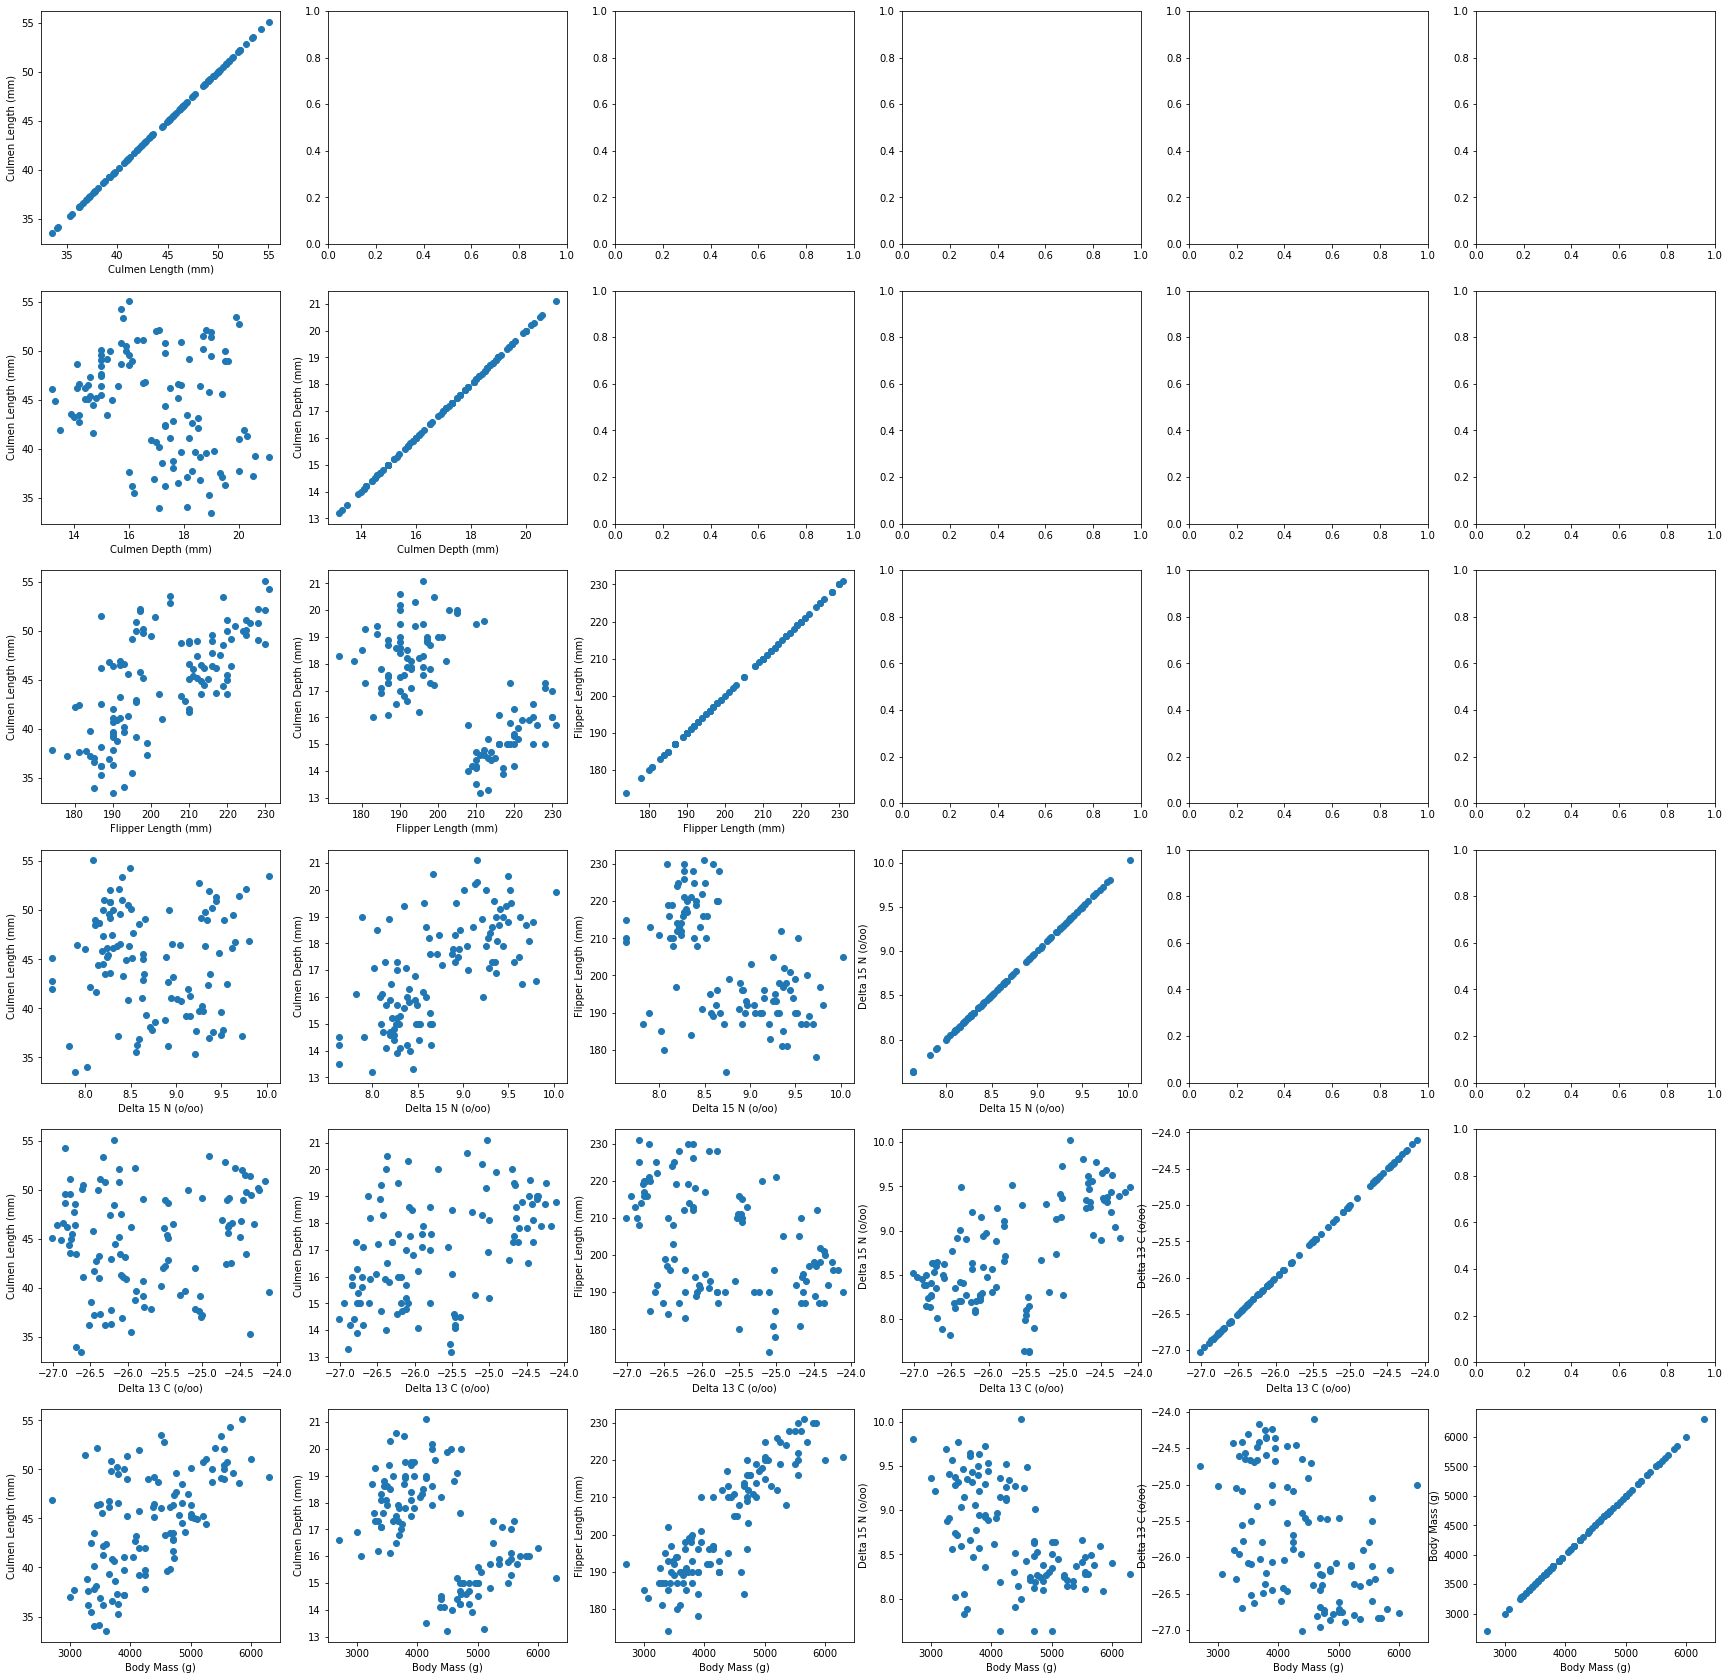

In [39]:
# 이산변수 : Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Delta 15 N (o/oo), Delta 13 C (o/oo)
fig, ax = plt.subplots(6,6,figsize = (30,30))
columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)']
for i in range(len(columns)) :
  for j in range(len(columns)) :
    if i>=j :
      ax[i][j].scatter(x=train_df[columns[i]], y=train_df[columns[j]])
      ax[i][j].set_xlabel(columns[i])
      ax[i][j].set_ylabel(columns[j])

- Culmen Depth의 경우 Body Mass와 scatter plot을 그렸을 때, 두 개 그룹으로 clustering되는 것을 확인할 수 있습니다.
- Flipper Length, Culmen Length는 Body Mass와 높은 상관성을 보이고, 서로도 높은 상관성을 보이고 있습니다. 이 경우 두 변수를 곱한 값을 새로운 변수로 추가해 볼 수 도 있을 것 같습니다.

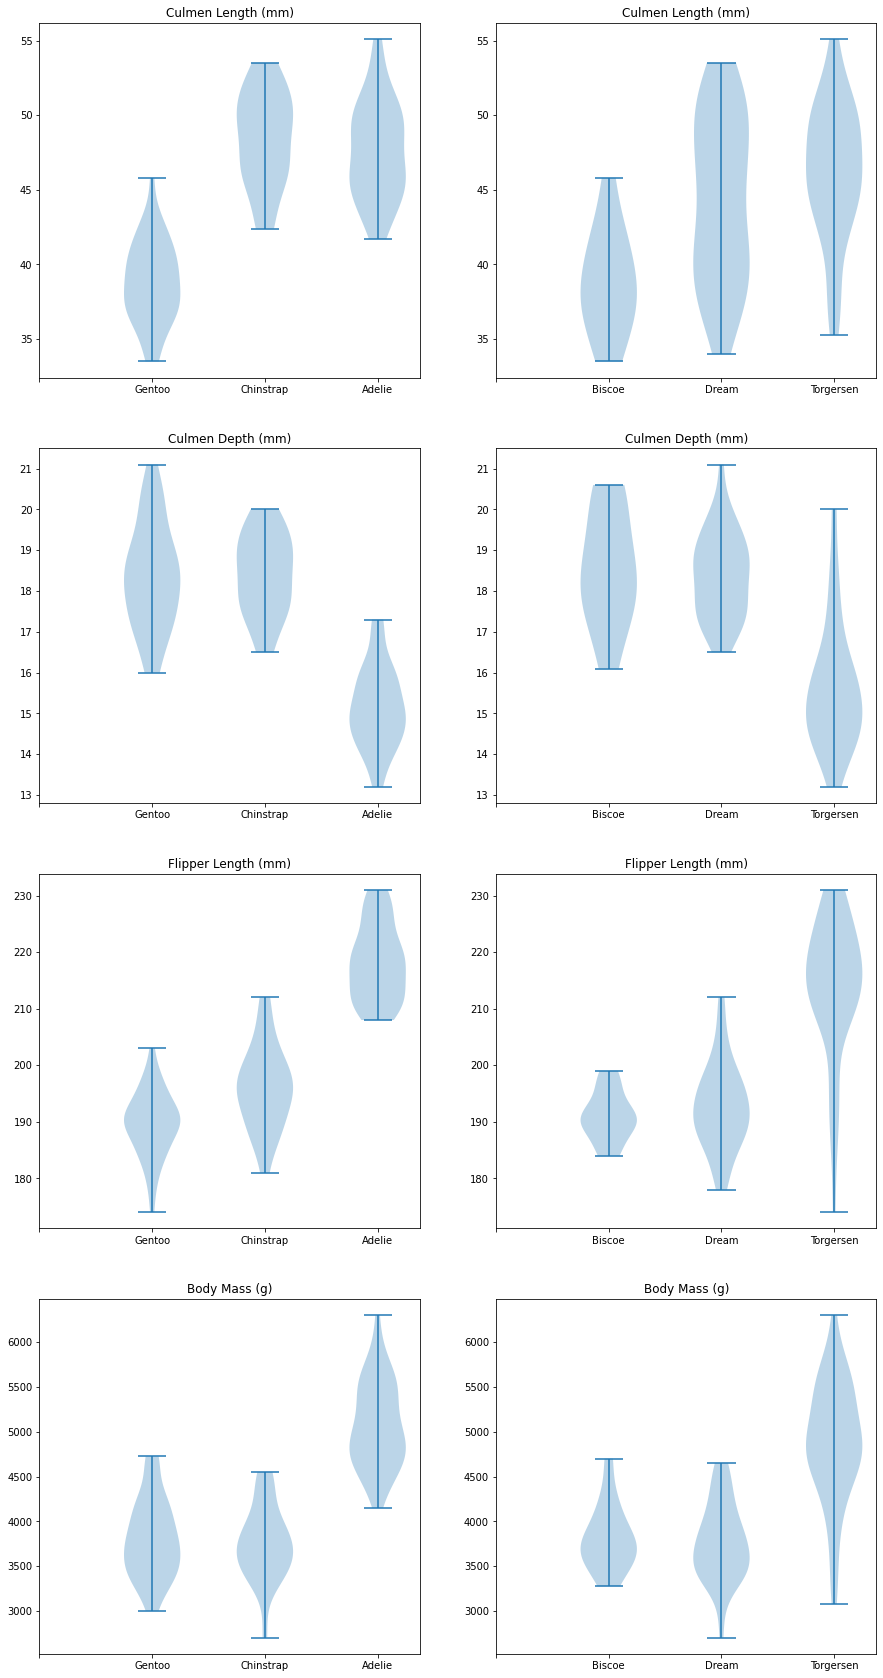

In [40]:
fig, ax = plt.subplots(4, 2, figsize = (15,30))

columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
species = ['Gentoo penguin (Pygoscelis papua)','Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)']
islands = ['Biscoe', 'Dream', 'Torgersen']

for i in range(4):
  series = [list(train_df[train_df['Species']==k][columns[i]]) for k in species][::-1]
  ax[i][0].violinplot(series)
  ax[i][0].set_title(columns[i])
  ax[i][0].xaxis.set_ticks(np.arange(4))
  ax[i][0].xaxis.set_ticklabels(['','Gentoo','Chinstrap','Adelie'])
  
  series = [list(train_df[train_df['Island']==k][columns[i]]) for k in islands][::-1]
  ax[i][1].violinplot(series)
  ax[i][1].set_title(columns[i])
  ax[i][1].xaxis.set_ticks(np.arange(4))
  ax[i][1].xaxis.set_ticklabels(['', 'Biscoe', 'Dream', 'Torgersen'])
  


plt.show()

# 2. 전처리부터 예측까지



## 2.1. 전처리 및 Feature Engineering
- Feature Engineering은 유용한 데이터 특징을 뽑아내고, 가공하는 과정입니다. <br/>
- 시각화 결과를 통해서 밝혀낸 유용한 지표들과 그렇지 않은 것들을 가려냈습니다. <br/>
- Feature Engineering을 통해서는 유용하지 않은 column을 삭제하거나, 새로운 변수를 생성할 수도 있습니다. <br/>
- 저 같은 경우에는 원핫 인코딩을 수행하였고, 결측치를 Adaboost 모델을 활용해 채웠습니다.
- Culmen, Flipper Length와 무게는 선형적인 관계가 발견되었기 때문에, 유용하게 활용할 수 있을 것입니다.
- 위의 두 상관관계가 높은 변수끼리는 곱해서 새로운 feature로 사용했습니다.


In [41]:
train_df['Culmen Length*Flipper Length'] = train_df['Culmen Length (mm)']*train_df['Flipper Length (mm)']
test_df['Culmen Length*Flipper Length'] = test_df['Culmen Length (mm)']*test_df['Flipper Length (mm)']

유용하지 않은 column은 과감하게 삭제하고, 아래의 column들만 예측에 활용했습니다.

In [42]:
processed_train_df = train_df[['Species','Sex','Island','Clutch Completion', 'Culmen Length (mm)', 'Flipper Length (mm)', 'Culmen Length*Flipper Length', 'Body Mass (g)']]
processed_test_df = test_df[['Species','Sex','Island', 'Clutch Completion', 'Culmen Length (mm)', 'Flipper Length (mm)', 'Culmen Length*Flipper Length']]

scikit-learn 전처리 방법 중 하나인 `LabelEncoder`를 활용하면 범주형 변수를 0,1,2와 같이 숫자로 변환할 수 있습니다. <br/>
이후 `pd.get_dummies()`를 활용하면 원핫 인코딩으로 변환이 가능합니다.

In [43]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

processed_train_df["Species"] = le.fit_transform(processed_train_df["Species"])
processed_train_df["Clutch Completion"] = le.fit_transform(processed_train_df["Clutch Completion"])
processed_train_df["Island"] = le.fit_transform(processed_train_df["Island"])

processed_test_df["Species"] = le.fit_transform(processed_test_df["Species"])
processed_test_df["Clutch Completion"] = le.fit_transform(processed_test_df["Clutch Completion"])
processed_test_df["Island"] = le.fit_transform(processed_test_df["Island"])

성별 결측치 채우기 : AdaBoostClassifier를 활용했습니다. <br/>
그 활용 근거는 [jinTaixun](https://dacon.io/competitions/official/235862/codeshare/4068?page=1&dtype=recent) 님의 공유 내용을 바탕으로 하고 있습니다.

In [44]:
from sklearn.ensemble import AdaBoostClassifier

sex_features = ['Culmen Length (mm)', 'Flipper Length (mm)', 'Species', 'Island']

sex_model = AdaBoostClassifier()
X_sex = processed_train_df[sex_features].iloc[processed_train_df['Sex'].dropna().index]
y_sex = processed_train_df['Sex'].iloc[processed_train_df['Sex'].dropna().index]
sex_model.fit(X_sex,y_sex)
processed_train_df['Sex'].iloc[np.where(processed_train_df['Sex'].isnull()==True)] =  sex_model.predict(processed_train_df[processed_train_df['Sex'].isnull()][sex_features])
processed_test_df['Sex'].iloc[np.where(processed_test_df['Sex'].isnull()==True)] =  sex_model.predict(processed_test_df[processed_test_df['Sex'].isnull()][sex_features])

get_dummies를 활용하면 원핫 인코딩이 가능합니다. <br/>
**하지만, get_dummies를 사용할 때는 주의가 필요합니다.** <br/>
- train, test 데이터셋의 범주형 데이터에 어떤 종류가 있는지 살펴보아야 합니다.
- 펭귄 데이터의 경우에는 Sex - Male/Female의 2가지, Island - 3가지, Species - 3가지로 train, test 데이터셋에서 같은 종류를 가집니다.
- 예를 들어, 100가지의 범주가 있는 데이터의 경우 어떤 범주는 train에는 있지만 test에는 없을 수도 있기 때문에, 그럴 경우 get_dummies를 사용하면 원핫 인코딩을 할 때 다르게 인코딩되는 문제가 발생할 수 있습니다.
- [원핫 인코딩 시 주의점](https://www.youtube.com/watch?time_continue=3779&v=keXrv3D2m8k&feature=emb_title)에 해당 내용이 자세히 기술되어 있습니다.

In [45]:
processed_train_df = pd.get_dummies(processed_train_df, columns = ['Sex'])
processed_train_df = pd.get_dummies(processed_train_df, columns = ['Island'])
processed_train_df = pd.get_dummies(processed_train_df, columns = ['Species'])

processed_test_df = pd.get_dummies(processed_test_df, columns = ['Sex'])
processed_test_df = pd.get_dummies(processed_test_df, columns = ['Island'])
processed_test_df = pd.get_dummies(processed_test_df, columns = ['Species'])

##2.2 Train

### 2.2.1 XGBoost

In [69]:
X_train, X_test, y_train, y_test = train_test_split(processed_train_df.drop('Body Mass (g)', axis=1), processed_train_df['Body Mass (g)'] ,test_size=0.1)

n_estimators = []
lrs = []
scores = []
for n_estimator in range(30,70):
  for lr in range(80,140):
    xgb_model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=n_estimator, learning_rate=lr/1000, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

    xgb_model.fit(X_train,y_train)

    predictions = xgb_model.predict(X_test)
    n_estimators.append(n_estimator)
    lrs.append(lr)
    scores.append(mean_squared_error(y_test, predictions))

시각화를 통해서 n_estimator, learning rate가 어떤 조건에서 가장 최적화될지 알아보고, score가 최적화되는 index를 찾아내어 파라미터를 튜닝합니다. <br/>

36 0.117


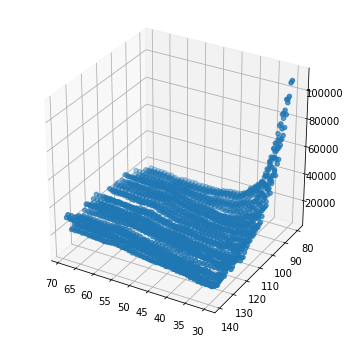

In [70]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(n_estimators, lrs, scores)
ax.view_init(elev=30., azim=120)
min_idx = scores.index(min(scores))
xgb_n_estimators = n_estimators[min_idx]
xgb_lr = lrs[min_idx]/1000
print(xgb_n_estimators, xgb_lr)

### 2.2.2 LGBM

In [59]:
import lightgbm
n_estimators = []
lrs = []
scores = []
for n_estimator in range(50,200):
  for lr in range(80,100):
    lgb_model =  lightgbm.LGBMRegressor(objective='regression',num_leaves=5,
                                  learning_rate=lr/1000, n_estimators=n_estimator,
                                  max_bin = 55, bagging_fraction = 0.8,
                                  bagging_freq = 5, feature_fraction = 0.2319,
                                  feature_fraction_seed=9, bagging_seed=9,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

    lgb_model.fit(processed_train_df.drop('Body Mass (g)', axis = 1) , processed_train_df['Body Mass (g)'])
    predictions = lgb_model.predict(X_test)
    n_estimators.append(n_estimator)
    lrs.append(lr)
    scores.append(mean_squared_error(y_test, predictions))

시각화를 통해서 n_estimator, learning rate가 어떤 조건에서 가장 최적화될지 알아보고, score가 최적화되는 index를 찾아내어 파라미터를 튜닝합니다.

115 0.09


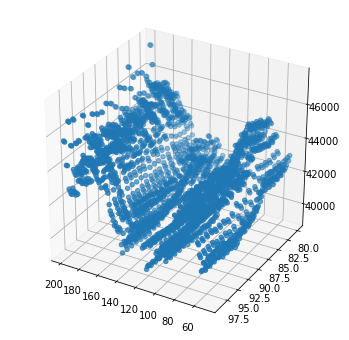

In [60]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(n_estimators, lrs, scores)
ax.view_init(elev=30., azim=120)
min_idx = scores.index(min(scores))
lgb_n_estimators = n_estimators[min_idx]
lgb_lr = lrs[min_idx]/1000
print(lgb_n_estimators, lgb_lr)

## 2.3 Inference
- XGBoost, LGBM 모델의 예측 결과를 평균 내어 제출하였습니다.
- 후처리 과정에서는, 펭귄 몸무게 단위가 5였기 때문에 가까운 5 단위로 반올림하여 제출했습니다.

In [71]:
xgb_model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=xgb_n_estimators, learning_rate=xgb_lr, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_model.fit(processed_train_df.drop('Body Mass (g)', axis = 1) , processed_train_df['Body Mass (g)'])

lgb_model =  lightgbm.LGBMRegressor(objective='regression',num_leaves=5,
                                  learning_rate=lgb_lr, n_estimators=lgb_n_estimators,
                                  max_bin = 55, bagging_fraction = 0.8,
                                  bagging_freq = 5, feature_fraction = 0.2319,
                                  feature_fraction_seed=9, bagging_seed=9,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb_model.fit(processed_train_df.drop('Body Mass (g)', axis = 1) , processed_train_df['Body Mass (g)'])

predictions_xgb = xgb_model.predict(processed_test_df)
predictions_lgb = lgb_model.predict(processed_test_df)

ss_df['Body Mass (g)'] = (predictions_xgb+predictions_lgb)//10*5 # 펭귄 몸무게가 5 단위이므로 후처리
ss_df.to_csv('submission.csv', index = False)